<a href="https://colab.research.google.com/github/KLeeDE/Python/blob/master/3_Python_Week3_Xarray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**GEOG473-673 Python Week3 Assignment**

Class : GEOG673 Select Technical Topics 

Topic : Important Python Modules

Writer : Kyungmin Lee / @KLeeDE

Date : Nov 25, 2020

#Tutorial

https://github.com/jsimkins2/geog473-673/blob/master/Python/Xarray_tutorial.ipynb

##Spatial Data & Xarray

* Gridded, multi-dimensional and large datasets, commonly used in earth sciences, but also increasingly finance, engineering (signal/image processing), and biological sciences
* Integration with other data analysis packages such as Pandas
* I/O operations (NetCDF)
* Plotting

Xarray can do things that a low-level (but important!) package like numpy cannot.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

* numpy: 수치 데이터 다루는 패키지. 다차원 행렬 자료구조 (특히 벡터형, 매트릭스형 데이터), 선형대수 계산에 용이

 - 다차원 배열 객체
 - 유니버셜 함수
 - 배열을 사용한 데이터 처리
 - 배열의 파일 입력, 출력
 - 선형대수
 - 난수 생성
 - 브로드캐스팅
 - 객체 생성이기 때문에 객체 주소지만 참조함

* pnadas: series, dataframe, panel 총 3가지의 데이터 구조 사용

 - 테이블을 수정하고 조작하는 다양한 기능 제공
 - SQL처럼 테이블에 쿼리나 조인 수행 가능
 - 각 열의 타입이 달라도 됨
 - SQL, xls, csv 등 데이터베이스 읽기

* matplotlib: 데이터 시각화


Note: 벡터를 numpy에서는 ndarray라고 부르고, pandas에서는 series라 부름

Reference: 

데이터분석을 위한 3종 패키지 https://wikidocs.net/21047

간단명료한 numpy와 pandas 차이 https://cleancode-ws.tistory.com/13



In [2]:
#Load in a built-in tutorial dataset from xarray
ds = xr.tutorial.load_dataset('air_temperature')
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.49 296.19 295.69
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [3]:
ds.air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
         238.59999],
        [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
         239.29999],
        [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
         241.7    ],
        ...,
        [296.6    , 296.19998, 296.4    , ..., 295.4    , 295.1    ,
         294.69998],
        [295.9    , 296.19998, 296.79   , ..., 295.9    , 295.9    ,
         295.19998],
        [296.29   , 296.79   , 297.1    , ..., 296.9    , 296.79   ,
         296.6    ]],

       [[242.09999, 242.7    , 243.09999, ..., 232.     , 233.59999,
         235.79999],
        [243.59999, 244.09999, 244.2    , ..., 231.     , 232.5    ,
         235.7    ],
        [253.2    , 252.89   , 252.09999, ..., 230.79999, 233.39   ,
         238.5    ],
        ...,
        [296.4    , 295.9    , 296.19998, ..., 295.4    , 295.1    ,
         294.79   ],
        [296.19998, 296.69998, 296.79   , ..., 295.6    , 295.5    ,
         295.1    ],
        [296.29   , 297.19998, 297.4    , ..., 296.4    , 296.4    ,
         296.6    ]],

       [[242.29999, 242.2    , 242.29999, ..., 234.29999, 236.09999,
         238.7    ],
        [244.59999, 244.39   , 244.     , ..., 230.29999, 232.     ,
         235.7    ],
        [256.19998, 255.5    , 254.2    , ..., 231.2    , 233.2    ,
         238.2    ],
        ...,
        [295.6    , 295.4    , 295.4    , ..., 296.29   , 295.29   ,
         295.     ],
        [296.19998, 296.5    , 296.29   , ..., 296.4    , 296.     ,
         295.6    ],
        [296.4    , 296.29   , 296.4    , ..., 297.     , 297.     ,
         296.79   ]],

       ...,

       [[243.48999, 242.98999, 242.09   , ..., 244.18999, 244.48999,
         244.89   ],
        [249.09   , 248.98999, 248.59   , ..., 240.59   , 241.29   ,
         242.68999],
        [262.69   , 262.19   , 261.69   , ..., 239.39   , 241.68999,
         245.18999],
        ...,
        [294.79   , 295.29   , 297.49   , ..., 295.49   , 295.38998,
         294.69   ],
        [296.79   , 297.88998, 298.29   , ..., 295.49   , 295.49   ,
         294.79   ],
        [298.19   , 299.19   , 298.79   , ..., 296.09   , 295.79   ,
         295.79   ]],

       [[245.79   , 244.79   , 243.48999, ..., 243.29   , 243.98999,
         244.79   ],
        [249.89   , 249.29   , 248.48999, ..., 241.29   , 242.48999,
         244.29   ],
        [262.38998, 261.79   , 261.29   , ..., 240.48999, 243.09   ,
         246.89   ],
        ...,
        [293.69   , 293.88998, 295.38998, ..., 295.09   , 294.69   ,
         294.29   ],
        [296.29   , 297.19   , 297.59   , ..., 295.29   , 295.09   ,
         294.38998],
        [297.79   , 298.38998, 298.49   , ..., 295.69   , 295.49   ,
         295.19   ]],

       [[245.09   , 244.29   , 243.29   , ..., 241.68999, 241.48999,
         241.79   ],
        [249.89   , 249.29   , 248.39   , ..., 239.59   , 240.29   ,
         241.68999],
        [262.99   , 262.19   , 261.38998, ..., 239.89   , 242.59   ,
         246.29   ],
        ...,
        [293.79   , 293.69   , 295.09   , ..., 295.29   , 295.09   ,
         294.69   ],
        [296.09   , 296.88998, 297.19   , ..., 295.69   , 295.69   ,
         295.19   ],
        [297.69   , 298.09   , 298.09   , ..., 296.49   , 296.19   ,
         295.69   ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.

In [4]:
ds.air.attrs

{'GRIB_id': 11,
 'GRIB_name': 'TMP',
 'actual_range': array([185.16, 322.1 ], dtype=float32),
 'dataset': 'NMC Reanalysis',
 'level_desc': 'Surface',
 'long_name': '4xDaily Air temperature at sigma level 995',
 'parent_stat': 'Other',
 'precision': 2,
 'statistic': 'Individual Obs',
 'units': 'degK',
 'var_desc': 'Air temperature'}

In [5]:
ds.air.values

array([[[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
         238.59999],
        [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
         239.29999],
        [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
         241.7    ],
        ...,
        [296.6    , 296.19998, 296.4    , ..., 295.4    , 295.1    ,
         294.69998],
        [295.9    , 296.19998, 296.79   , ..., 295.9    , 295.9    ,
         295.19998],
        [296.29   , 296.79   , 297.1    , ..., 296.9    , 296.79   ,
         296.6    ]],

       [[242.09999, 242.7    , 243.09999, ..., 232.     , 233.59999,
         235.79999],
        [243.59999, 244.09999, 244.2    , ..., 231.     , 232.5    ,
         235.7    ],
        [253.2    , 252.89   , 252.09999, ..., 230.79999, 233.39   ,
         238.5    ],
        ...,
        [296.4    , 295.9    , 296.19998, ..., 295.4    , 295.1    ,
         294.79   ],
        [296.19998, 296.69998, 296.79   , ..., 295.6    , 295.5    ,
   

In [6]:
type(ds.air.values)

numpy.ndarray

In [7]:
ds = ds.where(ds.air > 0)

In [8]:
temp_kelvin = ds.air.mean(dim='time')
temp_kelvin # The temperature now

<xarray.DataArray 'air' (lat: 25, lon: 53)>
array([[260.37564, 260.1826 , 259.88593, ..., 250.81511, 251.93733,
        253.43741],
       [262.7337 , 262.7936 , 262.7489 , ..., 249.75496, 251.5852 ,
        254.35849],
       [264.7681 , 264.3271 , 264.0614 , ..., 250.60707, 253.58247,
        257.71475],
       ...,
       [297.64932, 296.95294, 296.62912, ..., 296.81033, 296.28793,
        295.81622],
       [298.1287 , 297.93646, 297.47006, ..., 296.8591 , 296.77686,
        296.44348],
       [298.36594, 298.38593, 298.11386, ..., 297.33777, 297.28104,
        297.30502]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0

temp is now a data array with the same lat/lon coordinates but only has 1 time dimension because we averaged it out

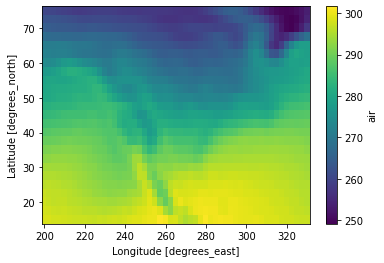

In [9]:
temp_kelvin.plot()

Notice that the output code lists "matplotlib.collections.QuadMesh", which signals that although we only used xarray dataset in our code to visualize this data, we still use matplotlib quadmesh plotting function to generate a plot

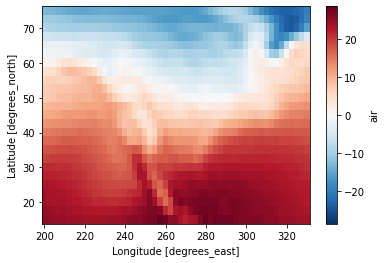

In [10]:
temp_celsius = temp_kelvin - 273.15
temp_celsius.plot()

In [11]:

ds['temp_celsius'] = temp_celsius
ds['temp_kelvin'] = temp_kelvin
ds

<xarray.Dataset>
Dimensions:       (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat           (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon           (lon) float32 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time          (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air           (time, lat, lon) float32 241.2 242.5 243.5 ... 296.19 295.69
    temp_celsius  (lat, lon) float32 -12.774353 -12.967407 ... 24.15503
    temp_kelvin   (lat, lon) float32 260.37564 260.1826 ... 297.28104 297.30502
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [12]:
ds.temp_kelvin

<xarray.DataArray 'temp_kelvin' (lat: 25, lon: 53)>
array([[260.37564, 260.1826 , 259.88593, ..., 250.81511, 251.93733,
        253.43741],
       [262.7337 , 262.7936 , 262.7489 , ..., 249.75496, 251.5852 ,
        254.35849],
       [264.7681 , 264.3271 , 264.0614 , ..., 250.60707, 253.58247,
        257.71475],
       ...,
       [297.64932, 296.95294, 296.62912, ..., 296.81033, 296.28793,
        295.81622],
       [298.1287 , 297.93646, 297.47006, ..., 296.8591 , 296.77686,
        296.44348],
       [298.36594, 298.38593, 298.11386, ..., 297.33777, 297.28104,
        297.30502]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0

In [13]:
ds.temp_kelvin.dims # dimensions of temp_celsius

('lat', 'lon')

In [14]:
ds.temp_kelvin.attrs['Description'] = 'Mean air tempterature (through time)'

In [15]:
ds.temp_kelvin.attrs

{'Description': 'Mean air tempterature (through time)'}

In [16]:
#we want to save what we did...how can we do that?
#We can write this dataset straight to a netcdf file !!!
ds.to_netcdf('new_file.nc')

In [17]:
# -- Indexing Xarray Datasets
ds.air[:, 1, 2]

<xarray.DataArray 'air' (time: 2920)>
array([244.7    , 244.2    , 244.     , ..., 248.59   , 248.48999,
       248.39   ], dtype=float32)
Coordinates:
    lat      float32 72.5
    lon      float32 205.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

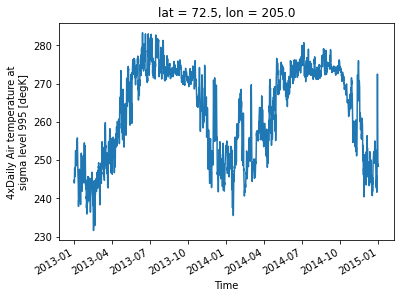

In [18]:
ds.air[:,1,2].plot()

In [19]:
ds.air.sel(lat=72.5,lon=205.0)

<xarray.DataArray 'air' (time: 2920)>
array([244.7    , 244.2    , 244.     , ..., 248.59   , 248.48999,
       248.39   ], dtype=float32)
Coordinates:
    lat      float32 72.5
    lon      float32 205.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

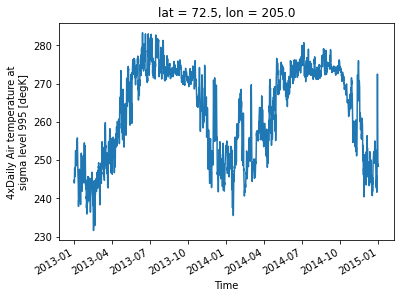

In [20]:
ds.air.sel(lat=72.5,lon=205.0).plot()

In [21]:
#we can also select via index instead of value

lat0 = ds.lat[0]
lon0 = ds.lon[0]
print(lat0, lon0)

<xarray.DataArray 'lat' ()>
array(75., dtype=float32)
Coordinates:
    lat      float32 75.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y <xarray.DataArray 'lon' ()>
array(200., dtype=float32)
Coordinates:
    lon      float32 200.0
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    axis:           X


In [22]:

ds.air.isel(lat=0, lon=0)

<xarray.DataArray 'air' (time: 2920)>
array([241.2    , 242.09999, 242.29999, ..., 243.48999, 245.79   ,
       245.09   ], dtype=float32)
Coordinates:
    lat      float32 75.0
    lon      float32 200.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

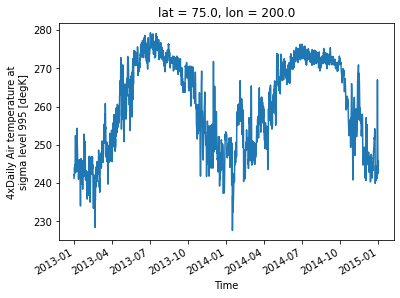

In [23]:
ds.air.isel(lat=0, lon=0).plot()

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-13.274353, -13.174353, -13.074353, -12.974353, -12.874353,
        -12.774353, -12.674353, -12.574353, -12.474353, -12.374353,
        -12.274353], dtype=float32),
 <a list of 10 Patch objects>)

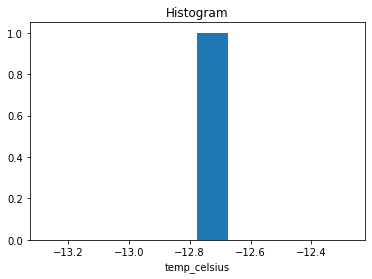

In [24]:
#We can also do this for our other variables, although remember, they only have a single time dimension
ds.temp_celsius.isel(lat=0, lon=0).plot()

(array([251., 532., 379., 296., 456., 613., 582., 510., 997., 684.]),
 array([232.39   , 239.361  , 246.332  , 253.30301, 260.274  , 267.245  ,
        274.216  , 281.187  , 288.15802, 295.129  , 302.1    ],
       dtype=float32),
 <a list of 10 Patch objects>)

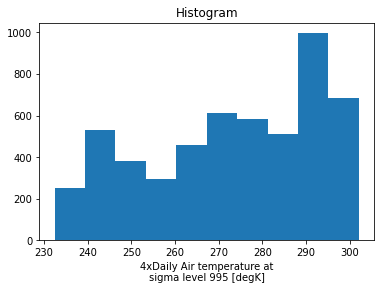

In [25]:
#let's look at a histogram of air temp now for 01/02/2013
ds.air.sel(time='2013-01-02').plot()

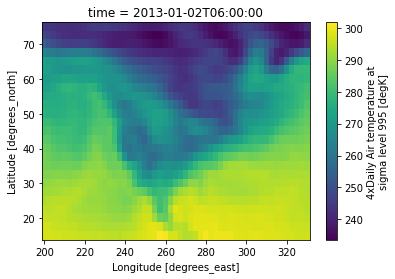

In [26]:
#or a single time value
ds.air.sel(time='2013-01-02T06:00').plot()

#Assignment
**Xarray Assignment**
Using the xarray tutorial dataset above, complete the following;


1) Plot the 200th time dimension to create a map of North American temperatures like the one above.

2) Plot time series of Newark, DE (39.6837° N, 75.7497° W) for the entire time window (2013-2015)

3) Compute the average temperature for Newark, DE over the time series. Plot as histogram - (there will just be 1 value in histogram)

Submit Plots only to Canvas

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

**1) Plot the 200th time dimension to create a map of North American temperatures like the one above**

In [28]:
ds = xr.tutorial.load_dataset('air_temperature')
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.49 296.19 295.69
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [34]:
ds.air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
         238.59999],
        [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
         239.29999],
        [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
         241.7    ],
        ...,
        [296.6    , 296.19998, 296.4    , ..., 295.4    , 295.1    ,
         294.69998],
        [295.9    , 296.19998, 296.79   , ..., 295.9    , 295.9    ,
         295.19998],
        [296.29   , 296.79   , 297.1    , ..., 296.9    , 296.79   ,
         296.6    ]],

       [[242.09999, 242.7    , 243.09999, ..., 232.     , 233.59999,
         235.79999],
        [243.59999, 244.09999, 244.2    , ..., 231.     , 232.5    ,
         235.7    ],
        [253.2    , 252.89   , 252.09999, ..., 230.79999, 233.39   ,
         238.5    ],
        ...,
        [296.4    , 295.9    , 296.19998, ..., 295.4    , 295.1    ,
         294.79   ],
        [296.19998, 296.69998, 296.79   , ..., 295.6    , 295.5    ,
         295.1    ],
        [296.29   , 297.19998, 297.4    , ..., 296.4    , 296.4    ,
         296.6    ]],

       [[242.29999, 242.2    , 242.29999, ..., 234.29999, 236.09999,
         238.7    ],
        [244.59999, 244.39   , 244.     , ..., 230.29999, 232.     ,
         235.7    ],
        [256.19998, 255.5    , 254.2    , ..., 231.2    , 233.2    ,
         238.2    ],
        ...,
        [295.6    , 295.4    , 295.4    , ..., 296.29   , 295.29   ,
         295.     ],
        [296.19998, 296.5    , 296.29   , ..., 296.4    , 296.     ,
         295.6    ],
        [296.4    , 296.29   , 296.4    , ..., 297.     , 297.     ,
         296.79   ]],

       ...,

       [[243.48999, 242.98999, 242.09   , ..., 244.18999, 244.48999,
         244.89   ],
        [249.09   , 248.98999, 248.59   , ..., 240.59   , 241.29   ,
         242.68999],
        [262.69   , 262.19   , 261.69   , ..., 239.39   , 241.68999,
         245.18999],
        ...,
        [294.79   , 295.29   , 297.49   , ..., 295.49   , 295.38998,
         294.69   ],
        [296.79   , 297.88998, 298.29   , ..., 295.49   , 295.49   ,
         294.79   ],
        [298.19   , 299.19   , 298.79   , ..., 296.09   , 295.79   ,
         295.79   ]],

       [[245.79   , 244.79   , 243.48999, ..., 243.29   , 243.98999,
         244.79   ],
        [249.89   , 249.29   , 248.48999, ..., 241.29   , 242.48999,
         244.29   ],
        [262.38998, 261.79   , 261.29   , ..., 240.48999, 243.09   ,
         246.89   ],
        ...,
        [293.69   , 293.88998, 295.38998, ..., 295.09   , 294.69   ,
         294.29   ],
        [296.29   , 297.19   , 297.59   , ..., 295.29   , 295.09   ,
         294.38998],
        [297.79   , 298.38998, 298.49   , ..., 295.69   , 295.49   ,
         295.19   ]],

       [[245.09   , 244.29   , 243.29   , ..., 241.68999, 241.48999,
         241.79   ],
        [249.89   , 249.29   , 248.39   , ..., 239.59   , 240.29   ,
         241.68999],
        [262.99   , 262.19   , 261.38998, ..., 239.89   , 242.59   ,
         246.29   ],
        ...,
        [293.79   , 293.69   , 295.09   , ..., 295.29   , 295.09   ,
         294.69   ],
        [296.09   , 296.88998, 297.19   , ..., 295.69   , 295.69   ,
         295.19   ],
        [297.69   , 298.09   , 298.09   , ..., 296.49   , 296.19   ,
         295.69   ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.

In [39]:
ds.air.time == 200

<xarray.DataArray 'time' (time: 2920)>
array([False, False, False, ..., False, False, False])
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

(array([  62.,  287.,  553.,  434.,  399.,  562.,  629.,  572., 1142.,
         660.]),
 array([227.  , 234.59, 242.18, 249.77, 257.36, 264.95, 272.54, 280.13,
        287.72, 295.31, 302.9 ], dtype=float32),
 <a list of 10 Patch objects>)

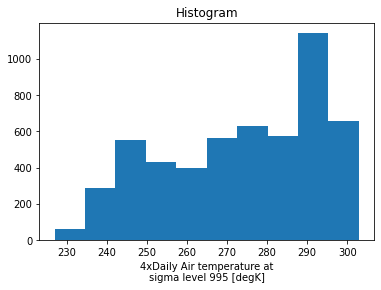

In [44]:
ds.air.sel(time='2013-01-01').plot()

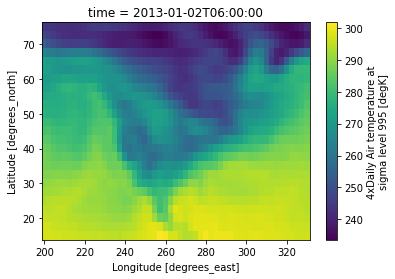

In [45]:
ds.air.sel(time='2013-01-02T06:00').plot()

**2) Plot time series of Newark, DE (39.6837° N, 75.7497° W) for the entire time window (2013-2015)**

**3) Compute the average temperature for Newark, DE over the time series. Plot as histogram - (there will just be 1 value in histogram)**